In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## About DATA

 Data file contains information about all the candidates who were given the offer letter, and their joining status.

All important details regarding the Candidate and the given offering i.e. Duration to accept the offer by candidate, Notice period of previous employer,any joining bonus offered, difference between expected and offered CTC, Gender of candidate, years of experiance etc. has been provided.

In [2]:
HR_works_data=pd.DataFrame(pd.read_csv('hr_Hiring_details_with_joining_status_LOB.csv',index_col = 0))


In [3]:
HR_works_data.head()

Candidate Ref DOJ Extended  Duration to accept offer  Notice period  \
Sno                                                                        
1          2110407          Yes                        14             30   
2          2112635           No                        18             30   
3          2112838           No                         3             45   
4          2115021           No                        26             30   
5          2115125          Yes                         1            120   

    Offered band  Pecent hike expected in CTC  Percent hike offered in CTC  \
Sno                                                                          
1             E2                       -20.79                        13.16   
2             E2                        50.00                       320.00   
3             E2                        42.84                        42.84   
4             E2                        42.84                        42.84   
5             E2                        42.59                        42.59   

     Percent difference CTC Joining Bonus Candidate relocate actual  Gender  \
Sno                                                                           
1                     42.86            No                        No  Female   
2                    180.00            No                        No    Male   
3                      0.00            No                        No    Male   
4                      0.00            No                        No    Male   
5                      0.00            No                       Yes    Male   

      Candidate Source  Rex in Yrs Location   Age  LOB_id  Status    LOB  
Sno                                                                       
1               Agency           7    Noida  34.0       1  Joined    ERS  
2    Employee Referral           8  Chennai  34.0       2  Joined  INFRA  
3               Agency           4    Noida  27.0       2  Joined  INFRA  
4    Employee Referral           4    Noida  34.0       2  Joined  INFRA  
5    Employee Referral           6    Noida  34.0       2  Joined  INFRA

In [4]:
HR_works_data.shape

(8995, 18)

In [5]:
HR_works_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8995 entries, 1 to 12333
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Candidate Ref                8995 non-null   int64  
 1   DOJ Extended                 8995 non-null   object 
 2   Duration to accept offer     8995 non-null   int64  
 3   Notice period                8995 non-null   int64  
 4   Offered band                 8982 non-null   object 
 5   Pecent hike expected in CTC  8995 non-null   float64
 6   Percent hike offered in CTC  8995 non-null   float64
 7   Percent difference CTC       8995 non-null   float64
 8   Joining Bonus                8995 non-null   object 
 9   Candidate relocate actual    8995 non-null   object 
 10  Gender                       8995 non-null   object 
 11  Candidate Source             8995 non-null   object 
 12  Rex in Yrs                   8995 non-null   int64  
 13  Location         

The data set contains 18 columns in which one has the target variable status, here there are few categorical data and few numerical data.
Few columns such as Candidate Red id Lob_id are not helpful for analysis hence, we drop them.

In [6]:
HR_works_df=HR_works_data.drop([ 'Candidate Ref','Pecent hike expected in CTC','Percent hike offered in CTC','LOB_id'], axis=1)
HR_works_df.head()

DOJ Extended  Duration to accept offer  Notice period Offered band  \
Sno                                                                      
1            Yes                        14             30           E2   
2             No                        18             30           E2   
3             No                         3             45           E2   
4             No                        26             30           E2   
5            Yes                         1            120           E2   

     Percent difference CTC Joining Bonus Candidate relocate actual  Gender  \
Sno                                                                           
1                     42.86            No                        No  Female   
2                    180.00            No                        No    Male   
3                      0.00            No                        No    Male   
4                      0.00            No                        No    Male   
5                      0.00            No                       Yes    Male   

      Candidate Source  Rex in Yrs Location   Age  Status    LOB  
Sno                                                               
1               Agency           7    Noida  34.0  Joined    ERS  
2    Employee Referral           8  Chennai  34.0  Joined  INFRA  
3               Agency           4    Noida  27.0  Joined  INFRA  
4    Employee Referral           4    Noida  34.0  Joined  INFRA  
5    Employee Referral           6    Noida  34.0  Joined  INFRA

# EDA (Exploratory Data Analysis)

### Missing values identification and treatment

In [7]:
HR_works_df.isna().sum()

DOJ Extended                  0
Duration to accept offer      0
Notice period                 0
Offered band                 13
Percent difference CTC        0
Joining Bonus                 0
Candidate relocate actual     0
Gender                        0
Candidate Source              0
Rex in Yrs                    0
Location                      0
Age                          15
Status                        0
LOB                           0
dtype: int64

Here we have Null values in Offered Band and Age. We cannot use the data frame with null values for analysis hence we handle the missing values either by replacing them or by dropping the missing values from the data.

Here we have replaced the null values with mode for Offered Band and median for Age.

In [8]:
HR_works_df['Age'].fillna(HR_works_df['Age'].median(),inplace=True)

In [9]:
HR_works_df['Offered band'].fillna('E1',inplace=True)
HR_works_df.isna().sum()

DOJ Extended                 0
Duration to accept offer     0
Notice period                0
Offered band                 0
Percent difference CTC       0
Joining Bonus                0
Candidate relocate actual    0
Gender                       0
Candidate Source             0
Rex in Yrs                   0
Location                     0
Age                          0
Status                       0
LOB                          0
dtype: int64

Now there are no null values no missing values.

## Univariate Analysis

Here we define a function 'univariateAnalysis_numeric' to display information as part of univariate analysis of numeric variables. The function will accept coulmn name and number of bins as arguments.

The function will display the statistical description of the the numeric variable, histogram or distplot to view the distribution and the box plot to view 5 point summary and outliers if any.

In [10]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(HR_works_df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(HR_works_df[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=HR_works_df[column])
    plt.show()

In [11]:
df_num = HR_works_df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

5

In [12]:
df_num.head()

Duration to accept offer  Notice period  Percent difference CTC  \
Sno                                                                    
1                          14             30                   42.86   
2                          18             30                  180.00   
3                           3             45                    0.00   
4                          26             30                    0.00   
5                           1            120                    0.00   

     Rex in Yrs   Age  
Sno                    
1             7  34.0  
2             8  34.0  
3             4  27.0  
4             4  34.0  
5             6  34.0

Description of Duration to accept offer
----------------------------------------------------------------------------
count    8995.000000
mean       21.434464
std        25.811616
min         0.000000
25%         3.000000
50%        10.000000
75%        33.000000
max       224.000000
Name: Duration to accept offer, dtype: float64 Distribution of Duration to accept offer
----------------------------------------------------------------------------


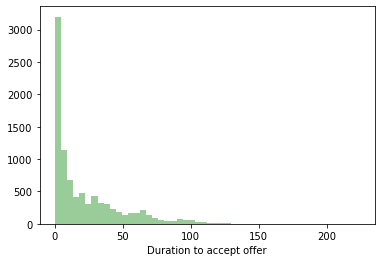

BoxPlot of Duration to accept offer
----------------------------------------------------------------------------


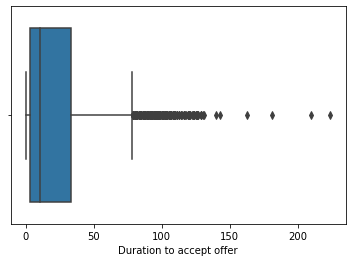

Description of Notice period
----------------------------------------------------------------------------
count    8995.000000
mean       39.291829
std        22.220239
min         0.000000
25%        30.000000
50%        30.000000
75%        60.000000
max       120.000000
Name: Notice period, dtype: float64 Distribution of Notice period
----------------------------------------------------------------------------


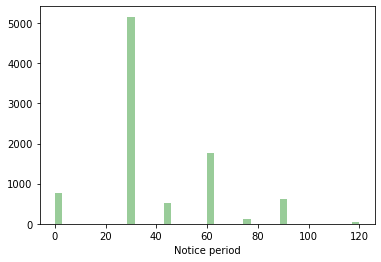

BoxPlot of Notice period
----------------------------------------------------------------------------


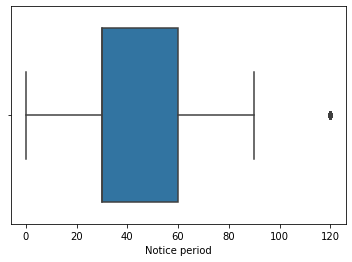

Description of Percent difference CTC
----------------------------------------------------------------------------
count    8995.000000
mean       -1.573802
std        19.610729
min       -67.270000
25%        -8.330000
50%         0.000000
75%         0.000000
max       300.000000
Name: Percent difference CTC, dtype: float64 Distribution of Percent difference CTC
----------------------------------------------------------------------------


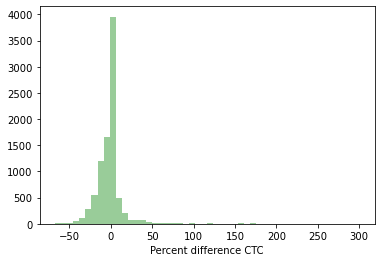

BoxPlot of Percent difference CTC
----------------------------------------------------------------------------


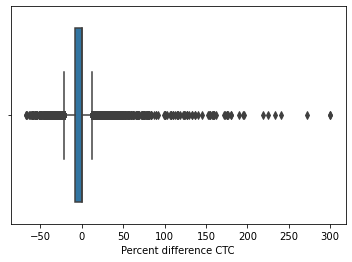

Description of Rex in Yrs
----------------------------------------------------------------------------
count    8995.000000
mean        4.239022
std         2.547571
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        24.000000
Name: Rex in Yrs, dtype: float64 Distribution of Rex in Yrs
----------------------------------------------------------------------------


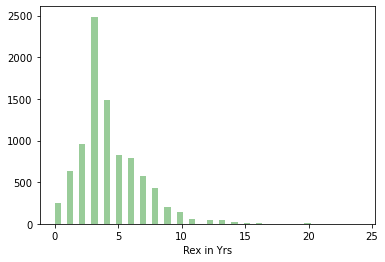

BoxPlot of Rex in Yrs
----------------------------------------------------------------------------


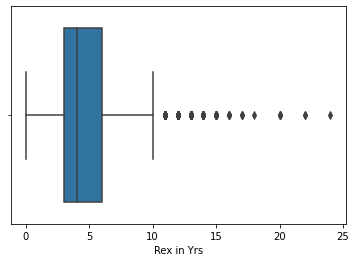

Description of Age
----------------------------------------------------------------------------
count    8995.000000
mean       29.910506
std         4.092452
min        20.000000
25%        27.000000
50%        29.000000
75%        34.000000
max        60.000000
Name: Age, dtype: float64 Distribution of Age
----------------------------------------------------------------------------


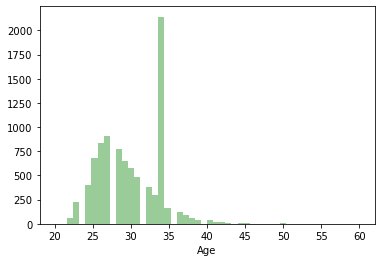

BoxPlot of Age
----------------------------------------------------------------------------


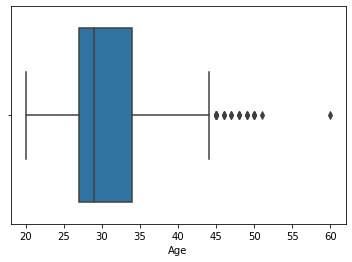

In [13]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

###### Observations:
  There are 33 numeric fields in the data
  
  ->Ages of the candidates range from 22 to 50
  
  ->Many had to accept the offer immediatly
  
  ->Most candidates had a notice period of 30 days
  
  ->Experience of most selected candidates were 3

Here we define a function **'univariateAnalysis_category'** to display information as part of univariate analysis of categorical variables.

The function should display the frequency of all the levels within the field and display a frequency plot

In [14]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure()
    df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

In [15]:
df_cat = HR_works_df.select_dtypes(include = ['object'])
listcatcolumns = list(df_cat.columns.values)
listcatcolumns

['DOJ Extended',
 'Offered band',
 'Joining Bonus',
 'Candidate relocate actual',
 'Gender',
 'Candidate Source',
 'Location',
 'Status',
 'LOB']

Details of DOJ Extended
----------------------------------------------------------------
No     4788
Yes    4207
Name: DOJ Extended, dtype: int64


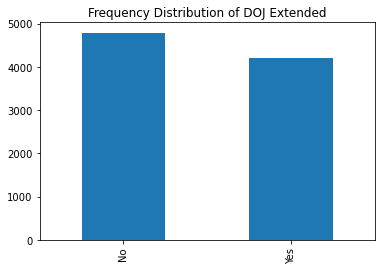

       
Details of Offered band
----------------------------------------------------------------
E1    5578
E2    2704
E3     502
E0     211
Name: Offered band, dtype: int64


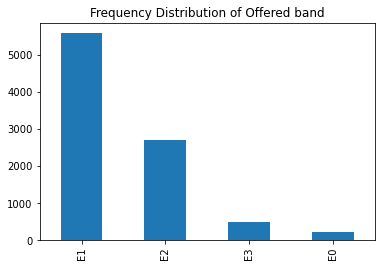

       
Details of Joining Bonus
----------------------------------------------------------------
No     8578
Yes     417
Name: Joining Bonus, dtype: int64


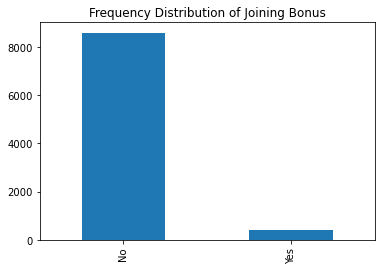

       
Details of Candidate relocate actual
----------------------------------------------------------------
No     7705
Yes    1290
Name: Candidate relocate actual, dtype: int64


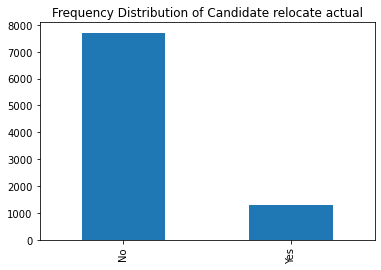

       
Details of Gender
----------------------------------------------------------------
Male      7444
Female    1551
Name: Gender, dtype: int64


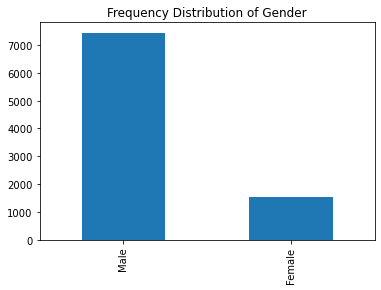

       
Details of Candidate Source
----------------------------------------------------------------
Direct               4801
Agency               2585
Employee Referral    1609
Name: Candidate Source, dtype: int64


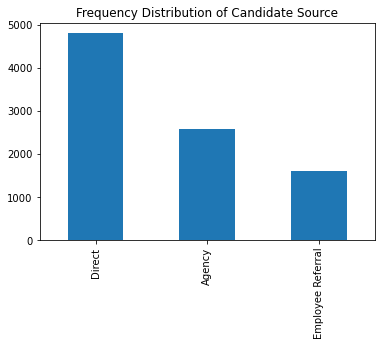

       
Details of Location
----------------------------------------------------------------
Chennai      3150
Noida        2727
Bangalore    2230
Hyderabad     341
Mumbai        197
Gurgaon       146
Kolkata       129
Pune           48
Others         13
Cochin          8
Ahmedabad       6
Name: Location, dtype: int64


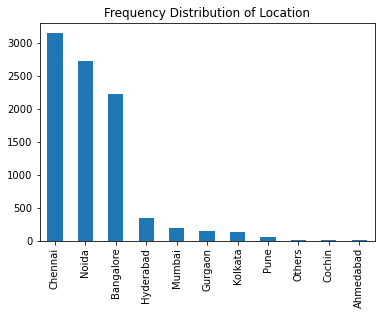

       
Details of Status
----------------------------------------------------------------
Joined        7313
Not Joined    1682
Name: Status, dtype: int64


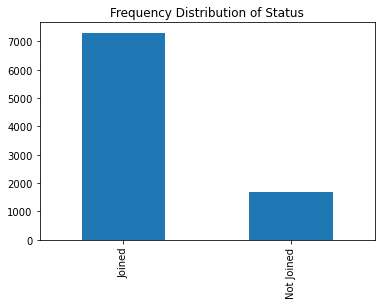

       
Details of LOB
----------------------------------------------------------------
INFRA         2850
ERS           2426
BFSI          1396
ETS            691
CSMP           579
AXON           568
EAS            346
Healthcare     124
MMS             15
Name: LOB, dtype: int64


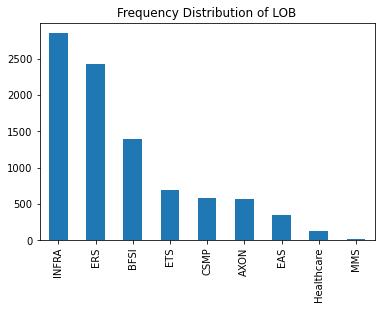

In [16]:
for x in listcatcolumns:
    univariateAnalysis_category(x)

###### Observations:
  There are 33 numeric fields in the data
  
  ->DOJ is not extended for most of the candidates
  
  ->More male candidates were selected.
  
  ->E1 has the most offerings.
  
  ->Joining Bonus is not given for many candidates.
  
  ->Many candidates need not relocated their location.
  
  ->Chennai had most number of candidates
  
  ->Infra had most of the candidates.
  
  

In [17]:
df_Joined=HR_works_df.loc[HR_works_df['Status']=='Joined']
df_Not_Joined=HR_works_df.loc[HR_works_df['Status']=='Not Joined']

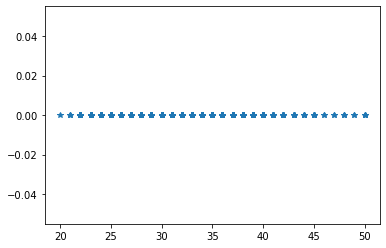

In [18]:
plt.plot(df_Joined['Age'],np.zeros_like(df_Joined['Age']),'*')

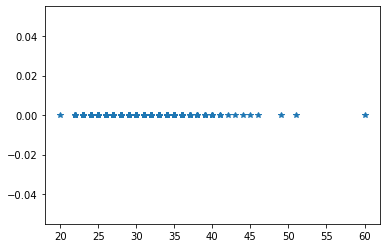

In [19]:
plt.plot(df_Not_Joined['Age'],np.zeros_like(df_Not_Joined['Age']),'*')

## Bivariate Analysis 

In [20]:
corr = df_num.corr(method='pearson')

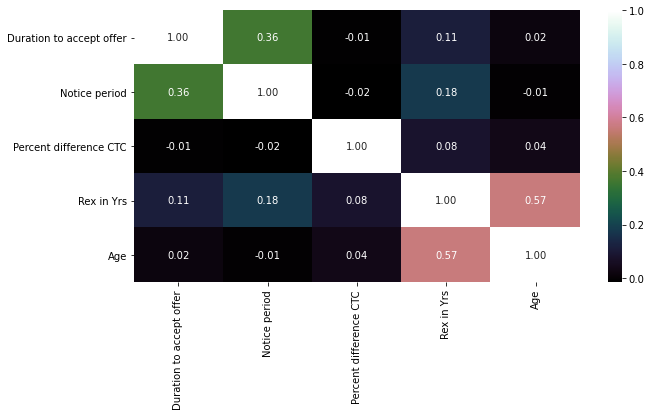

In [21]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(10, 5))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',cmap='cubehelix')
plt.show()

##### Observations:
Many features are correlated but the most prominant once are, 

o Age is highly correlated with experience in years

o Notice period and duration to accept the offer are also correlated




 Analysis between Duration to accept offer vs Notice period grouping (hue) by 'Status' using scatteplot



<AxesSubplot:title={'center':'Duration to accept offer vs Notice period(r = 0.36)'}, xlabel='Duration to accept offer', ylabel='Notice period'>

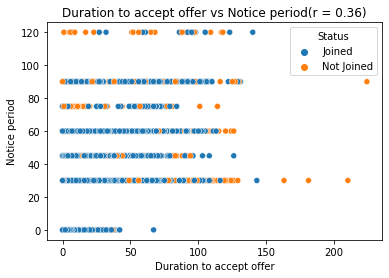

In [22]:
from scipy.stats import pearsonr
plt.title('Duration to accept offer vs Notice period(r = {0:0.2f})'.format(pearsonr(HR_works_df['Duration to accept offer'],HR_works_df['Notice period'])[0]))
sns.scatterplot(x="Duration to accept offer",y="Notice period",data = HR_works_df,hue="Status")

Analysis between Duration to accept offer vs Notice period grouping (hue) by 'Candidate Source' using scatteplot



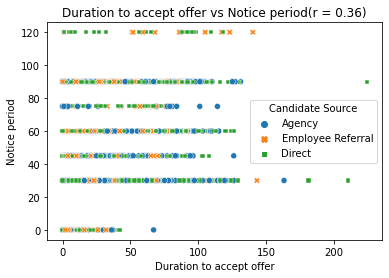

In [23]:
plt.title('Duration to accept offer vs Notice period(r = {0:0.2f})'.format(pearsonr(HR_works_df['Duration to accept offer'],HR_works_df['Notice period'])[0]))
sns.scatterplot(x="Duration to accept offer", y="Notice period",hue="Candidate Source", style="Candidate Source", data=HR_works_df)
plt.show()

Analysis between Experience vs Age grouping (hue) by 'Status' using scatteplot



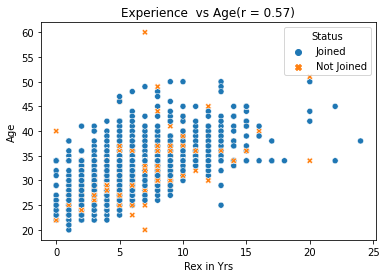

In [24]:
plt.title('Experience  vs Age(r = {0:0.2f})'.format(pearsonr(HR_works_df['Rex in Yrs'],HR_works_df['Age'])[0]))
sns.scatterplot(x="Rex in Yrs", y="Age",hue="Status", style="Status", data=HR_works_df)
plt.show()

## Multivariate Analysis 

In [25]:
HR_works_df['Candidate Source'].unique()

array(['Agency', 'Employee Referral', 'Direct'], dtype=object)

using replot to separate the plot into columns. Here 'Candidate Source' has 3 categorical values so the plot is divided into 3 columns here





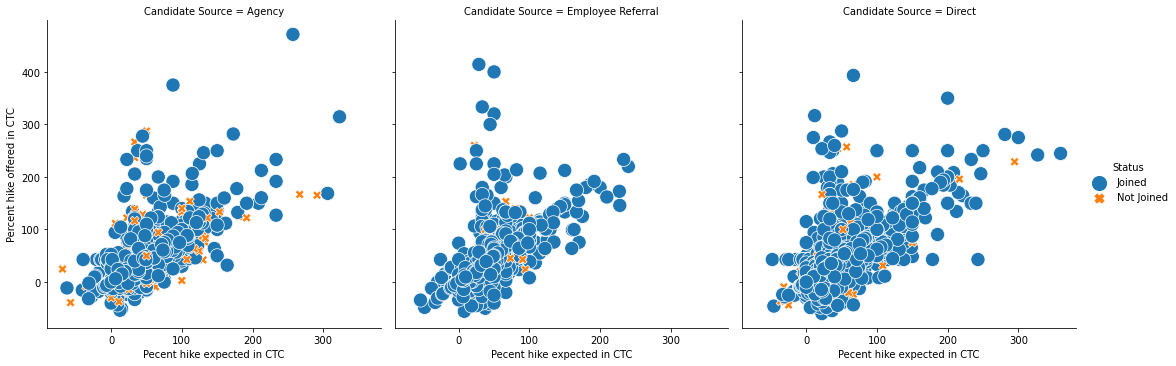

In [26]:
sns.relplot(x="Pecent hike expected in CTC",y="Percent hike offered in CTC",col="Candidate Source",hue="Status",style="Status",
            kind="scatter",data =HR_works_data ,size ="Status",sizes=(80,200))
plt.show()

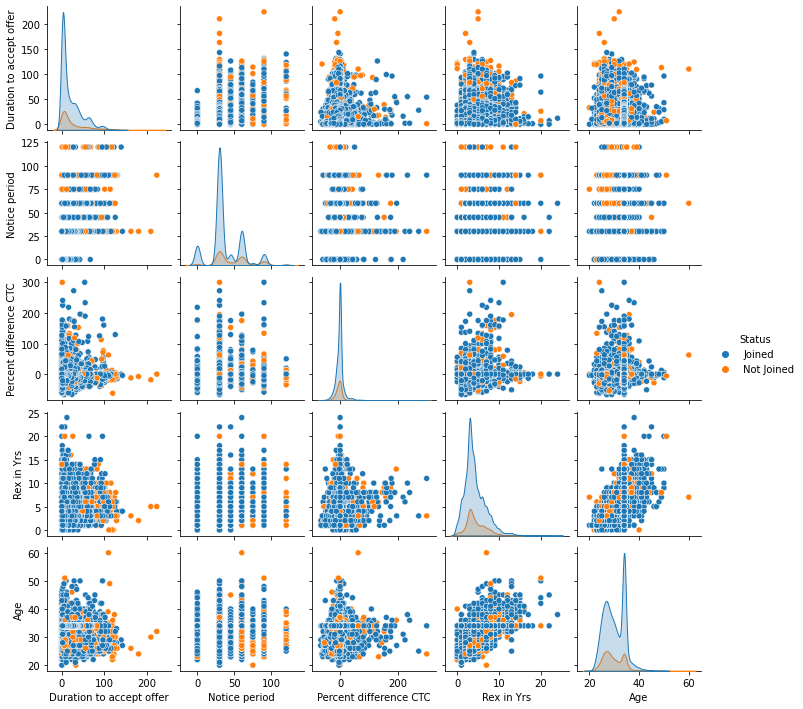

In [27]:
sns.pairplot(HR_works_df,hue ='Status',size = 2)
plt.show()

## Outlier Treatment

Using boxplot we can spot the outliers

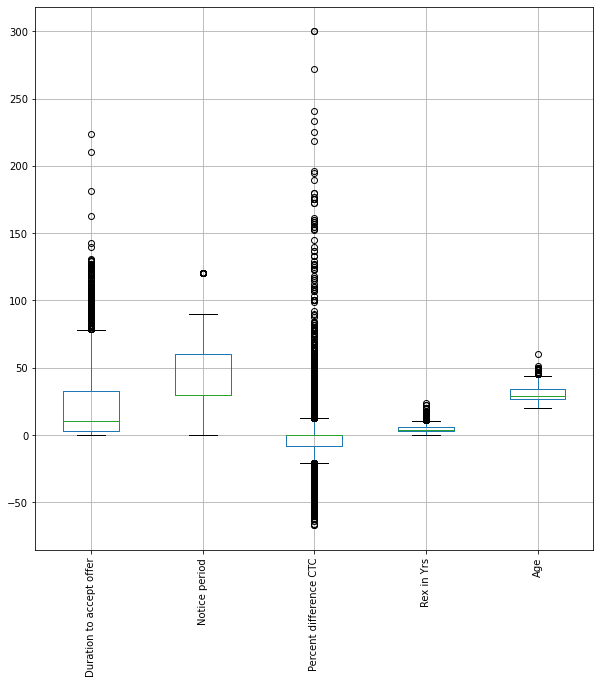

In [28]:
df_num.boxplot(figsize=(10,10))
plt.xticks(rotation=90)
plt.show()

To treat outliers we define a function **'treat_outlier'**. 

- For the higher outliers we will treat it to get it at 95 percentile value. 

- Lower level outliers will be treated to get it at 5 percentile value.

In [29]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [30]:
outlier_list = [x for x in df_num.columns ]

In [31]:
for i in df_num[outlier_list]:    
    df_num[i]=treat_outlier(df_num[i])

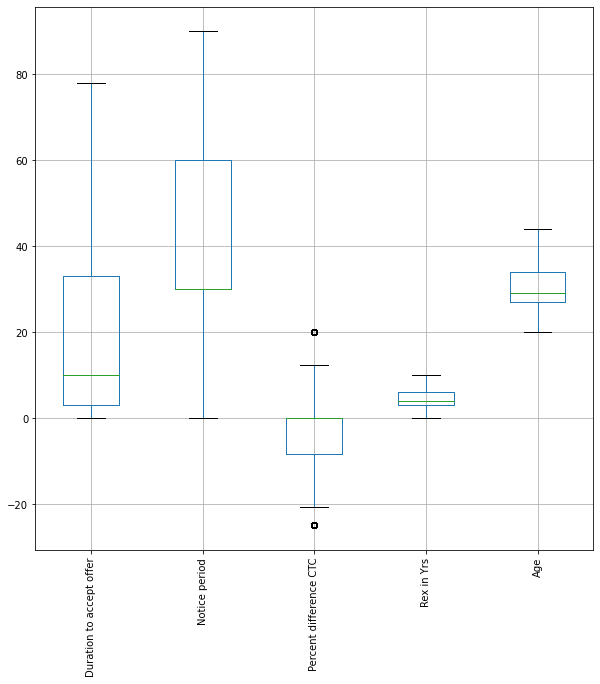

In [32]:
df_num.boxplot(figsize=(10,10))
plt.xticks(rotation=90)
plt.show()

We have tried to make reduce the outliers

## Data Scaling (z-score)

Data scaling through  Z-score normalization can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.

Formula for Z score = (Observation — Mean)/Standard Deviation \ z = (X — μ) / σ



In [34]:
from sklearn.model_selection import train_test_split

X = HR_works_df[HR_works_df.describe().columns]
y = HR_works_df['Status']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [35]:
df_z_scaled = X.copy()
# apply normalization techniques
for column in df_z_scaled.columns:
    df_z_scaled[column] = (df_z_scaled[column] - df_z_scaled[column].mean()) / df_z_scaled[column].std()
# view normalized data
#display(df_z_scaled)
df_z_scaled.head()

Duration to accept offer  Notice period  Percent difference CTC  \
Sno                                                                    
1                   -0.288028      -0.418170                2.265790   
2                   -0.133059      -0.418170                9.258901   
3                   -0.714193       0.256891                0.080252   
4                    0.176879      -0.418170                0.080252   
5                   -0.791677       3.632192                0.080252   

     Rex in Yrs       Age  
Sno                        
1      1.083769  0.999277  
2      1.476300  0.999277  
3     -0.093823 -0.711189  
4     -0.093823  0.999277  
5      0.691238  0.999277

### Min/Max Scaling

x_scaled = (x – x_min)/(x_max – x_min)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

features = df_num.copy()
features

Duration to accept offer  Notice period  Percent difference CTC  \
Sno                                                                      
1                          14.0           30.0                   20.00   
2                          18.0           30.0                   20.00   
3                           3.0           45.0                    0.00   
4                          26.0           30.0                    0.00   
5                           1.0           90.0                    0.00   
...                         ...            ...                     ...   
12319                       4.0            0.0                    0.00   
12327                       2.0            0.0                    0.00   
12331                       0.0            0.0                    0.00   
12332                       0.0           30.0                  -13.04   
12333                       2.0            0.0                  -25.00   

       Rex in Yrs   Age  
Sno                      
1             7.0  34.0  
2             8.0  34.0  
3             4.0  27.0  
4             4.0  34.0  
5             6.0  34.0  
...           ...   ...  
12319         1.0  34.0  
12327         3.0  34.0  
12331         5.0  34.0  
12332         4.0  34.0  
12333         1.0  34.0  

[8995 rows x 5 columns]

In [37]:
df_min_max_scaled=[]
df_min_max_scaled=pd.DataFrame(scaler.fit_transform(features.values))
df_min_max_scaled.head()

0         1         2    3         4
0  0.179487  0.333333  1.000000  0.7  0.583333
1  0.230769  0.333333  1.000000  0.8  0.583333
2  0.038462  0.500000  0.555556  0.4  0.291667
3  0.333333  0.333333  0.555556  0.4  0.583333
4  0.012821  1.000000  0.555556  0.6  0.583333

## Data Transformation

 Data transformation is used to transform the data into a machine-learning-digestible format. All machine learning algorithms are based on mathematics. So, we need to convert all the columns into numerical format
 
 Here we have many categorical columns including the target column so we need to transform it to numerical

##### Label Encoding

This is a technique in which we replace each value in a categorical column with numbers from 0 to N-1

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [39]:
HR_works_df['Gender_male'] = le.fit_transform(HR_works_df['Gender'])
HR_works_df['DOJ Extended'] = le.fit_transform(HR_works_df['DOJ Extended'])
HR_works_df['Joining Bonus'] = le.fit_transform(HR_works_df['Joining Bonus'])
HR_works_df['Candidate relocate actual'] = le.fit_transform(HR_works_df['Candidate relocate actual'])
HR_works_df['Status_NotJoined'] = le.fit_transform(HR_works_df['Status'])



Here we used label encoder for all the categories which has two classes.


In [40]:
HR_works_df=HR_works_df.drop(['Gender'],axis=1)

In [41]:
HR_works_df=HR_works_df.drop(['Status'],axis=1)

In [42]:
HR_works_df.head()

DOJ Extended  Duration to accept offer  Notice period Offered band  \
Sno                                                                       
1               1                        14             30           E2   
2               0                        18             30           E2   
3               0                         3             45           E2   
4               0                        26             30           E2   
5               1                         1            120           E2   

     Percent difference CTC  Joining Bonus  Candidate relocate actual  \
Sno                                                                     
1                     42.86              0                          0   
2                    180.00              0                          0   
3                      0.00              0                          0   
4                      0.00              0                          0   
5                      0.00              0                          1   

      Candidate Source  Rex in Yrs Location   Age    LOB  Gender_male  \
Sno                                                                     
1               Agency           7    Noida  34.0    ERS            0   
2    Employee Referral           8  Chennai  34.0  INFRA            1   
3               Agency           4    Noida  27.0  INFRA            1   
4    Employee Referral           4    Noida  34.0  INFRA            1   
5    Employee Referral           6    Noida  34.0  INFRA            1   

     Status_NotJoined  
Sno                    
1                   0  
2                   0  
3                   0  
4                   0  
5                   0

###### One-Hot Encoding

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

We apply it for the columns who have more than 2 classes


In [43]:
encoded_Location=pd.get_dummies(HR_works_df['Location'])
encoded_Location.head()

Ahmedabad  Bangalore  Chennai  Cochin  Gurgaon  Hyderabad  Kolkata  \
Sno                                                                       
1            0          0        0       0        0          0        0   
2            0          0        1       0        0          0        0   
3            0          0        0       0        0          0        0   
4            0          0        0       0        0          0        0   
5            0          0        0       0        0          0        0   

     Mumbai  Noida  Others  Pune  
Sno                               
1         0      1       0     0  
2         0      0       0     0  
3         0      1       0     0  
4         0      1       0     0  
5         0      1       0     0

In [44]:
HR_works_df=pd.get_dummies(HR_works_df,columns=['Candidate Source','Location','LOB','Offered band'])

In [45]:
HR_works_df.head()

DOJ Extended  Duration to accept offer  Notice period  \
Sno                                                          
1               1                        14             30   
2               0                        18             30   
3               0                         3             45   
4               0                        26             30   
5               1                         1            120   

     Percent difference CTC  Joining Bonus  Candidate relocate actual  \
Sno                                                                     
1                     42.86              0                          0   
2                    180.00              0                          0   
3                      0.00              0                          0   
4                      0.00              0                          0   
5                      0.00              0                          1   

     Rex in Yrs   Age  Gender_male  Status_NotJoined  ...  LOB_EAS  LOB_ERS  \
Sno                                                   ...                     
1             7  34.0            0                 0  ...        0        1   
2             8  34.0            1                 0  ...        0        0   
3             4  27.0            1                 0  ...        0        0   
4             4  34.0            1                 0  ...        0        0   
5             6  34.0            1                 0  ...        0        0   

     LOB_ETS  LOB_Healthcare  LOB_INFRA  LOB_MMS  Offered band_E0  \
Sno                                                                 
1          0               0          0        0                0   
2          0               0          1        0                0   
3          0               0          1        0                0   
4          0               0          1        0                0   
5          0               0          1        0                0   

     Offered band_E1  Offered band_E2  Offered band_E3  
Sno                                                     
1                  0                1                0  
2                  0                1                0  
3                  0                1                0  
4                  0                1                0  
5                  0                1                0  

[5 rows x 37 columns]

## Feature Engineering

#### Feature Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

Here we use the chi-squared (chi²) statistical test  non-negative features to select 10 of the best features 

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = HR_works_df.drop([ 'Status_NotJoined','Percent difference CTC'], axis=1)  
y = HR_works_df['Status_NotJoined']

In [47]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [48]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [49]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 

In [50]:

featureScores

Specs        Score
0                         DOJ Extended     0.178294
1             Duration to accept offer  1197.377612
2                        Notice period  4171.452794
3                        Joining Bonus     0.144249
4            Candidate relocate actual   296.701764
5                           Rex in Yrs    19.587767
6                                  Age    10.665055
7                          Gender_male     0.256147
8              Candidate Source_Agency    51.037803
9              Candidate Source_Direct     1.560831
10  Candidate Source_Employee Referral    47.570437
11                  Location_Ahmedabad     0.016306
12                  Location_Bangalore    14.871932
13                    Location_Chennai    11.737544
14                     Location_Cochin     0.202233
15                    Location_Gurgaon     0.022017
16                  Location_Hyderabad     2.435053
17                    Location_Kolkata     1.213284
18                     Location_Mumbai     8.375138
19                      Location_Noida    50.664993
20                     Location_Others     2.990018
21                       Location_Pune     0.143792
22                            LOB_AXON     5.497577
23                            LOB_BFSI    27.185880
24                            LOB_CSMP     0.018289
25                             LOB_EAS    14.169218
26                             LOB_ERS    16.224552
27                             LOB_ETS     1.419635
28                      LOB_Healthcare     0.074754
29                           LOB_INFRA    78.931046
30                             LOB_MMS     3.450021
31                     Offered band_E0     3.466190
32                     Offered band_E1     0.001289
33                     Offered band_E2     0.261674
34                     Offered band_E3     5.173555

In [51]:
print(featureScores.nlargest(10,'Score')) 

                                 Specs        Score
2                        Notice period  4171.452794
1             Duration to accept offer  1197.377612
4            Candidate relocate actual   296.701764
29                           LOB_INFRA    78.931046
8              Candidate Source_Agency    51.037803
19                      Location_Noida    50.664993
10  Candidate Source_Employee Referral    47.570437
23                            LOB_BFSI    27.185880
5                           Rex in Yrs    19.587767
26                             LOB_ERS    16.224552


#### Feature Importance

You  get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives  a score for each feature of your data, the higher the score more important or relevant is the feature towards the output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [53]:
print(model.feature_importances_)

[3.88074596e-02 2.79367844e-01 1.15299445e-01 1.35790619e-02
 4.13639007e-02 1.33527279e-01 1.76845112e-01 2.80688048e-02
 1.00964935e-02 9.38240317e-03 8.46404458e-03 3.02261281e-04
 1.19806339e-02 1.15916847e-02 2.32230034e-04 3.96436192e-03
 5.92469004e-03 3.51721812e-03 2.93796983e-03 9.68660099e-03
 1.22670939e-04 2.11627972e-03 7.84531978e-03 8.00170831e-03
 7.20614978e-03 6.83265364e-03 1.17326791e-02 8.32334883e-03
 3.38900723e-03 1.21525785e-02 5.88419256e-04 2.77726926e-03
 8.95238267e-03 1.01470207e-02 4.87301214e-03]


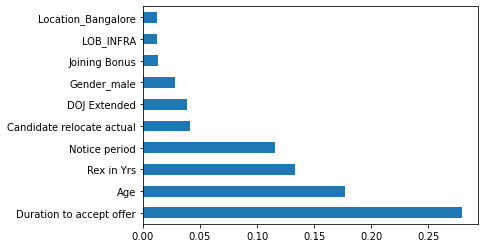

In [54]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Dimensionality Reduction

### PCA

Principle Component Analysis is used to reduce the feature dimension, Here we have 35 features and we are going to reduce them.

In [55]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [56]:
x=HR_works_df.iloc[:,:-1]
y=HR_works_df.iloc[:,-1].values

In [57]:
from scipy.stats import zscore
x=x.apply(zscore)

In [69]:
pca = PCA(n_components=35, random_state=123)
principalComponents = pca.fit_transform(x)
principalComponents.transpose()
pca.components_
var_exp = pca.explained_variance_ratio_

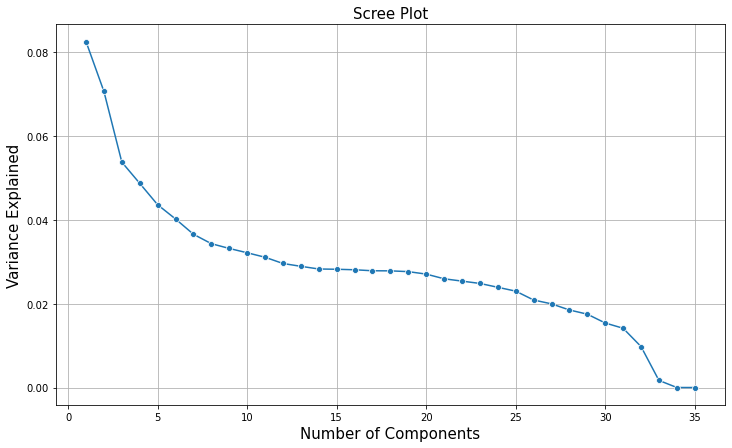

In [70]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

Here we have reduced the number of features to 8

In [71]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8'])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}


In [72]:
finalDf = pd.concat([principalDf, HR_works_df[['Status_NotJoined']]], axis = 1)

In [73]:
finalDf.dropna(axis=0,inplace=True)

In [74]:
finalDf

principal component 1  principal component 2  principal component 3  \
1                  3.596910               0.410754              -2.565850   
2                  1.901331              -1.200291              -1.762159   
3                  3.146678              -0.976500              -1.511159   
4                  3.548719               0.465255              -1.476755   
5                  0.982905              -1.558955              -0.859961   
...                     ...                    ...                    ...   
8988              -1.769083               0.514789              -2.623876   
8989              -0.913431              -0.693897              -1.722364   
8992               3.084568              -1.505329              -0.084340   
8993               0.974806              -1.928786               0.570497   
8994              -0.305773              -2.204192              -1.494448   

      principal component 4  principal component 5  principal component 6  \
1                 -0.650617              -1.588896               0.790401   
2                 -1.235209               0.203448              -0.844324   
3                 -1.232016               0.873531              -0.017162   
4                 -0.129887               1.793784              -1.178653   
5                 -0.641389               2.129248              -0.066694   
...                     ...                    ...                    ...   
8988              -0.226713               0.431502               1.437442   
8989              -0.384296              -0.872046              -0.189859   
8992              -0.291409              -0.752007               0.957473   
8993              -0.082944               0.241046               0.706246   
8994              -0.276908              -0.070849               1.364921   

      principal component 7  principal component 8  Status_NotJoined  
1                 -2.355187              -1.111566               0.0  
2                  1.137082              -0.335875               0.0  
3                 -0.498788               0.411618               0.0  
4                 -0.395544               0.352585               0.0  
5                 -1.452059               0.412310               0.0  
...                     ...                    ...               ...  
8988               1.563453              -0.953858               1.0  
8989               0.482810               0.357425               0.0  
8992               0.430425              -0.149929               1.0  
8993               0.086306               0.530787               0.0  
8994              -1.361230               0.671372               0.0  

[6953 rows x 9 columns]

In [75]:
pca.explained_variance_ratio_

array([0.08244276, 0.07056302, 0.05369991, 0.04860252, 0.04348136,
       0.04003012, 0.03632198, 0.03389899])

In [76]:
import plotly.express as px
fig = px.scatter_matrix(
    principalComponents,
    labels=labels,
    dimensions=range(8),
    color=HR_works_data["Status"]
)

fig.update_traces(diagonal_visible=False)
fig.show()